In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
%matplotlib inline  

from scipy.stats import pearsonr
import statsmodels.api as sm
sns.set_palette('Blues')

# What places showed an increasing trend of number of visits?¶

In [3]:
provinces_mobility = pd.read_csv('/Users/ljy/Desktop/CleanedData/canada_provinces_mobility.csv', parse_dates=['date'])
provinces_mobility = provinces_mobility.loc[provinces_mobility.date >= '2020-03-16']

In [4]:
provinces_mobility.head()
provinces_mobility = provinces_mobility.rename(columns={'retail_recreation': 'Retail & Recreation', \
                                                       'grocery_pharmacy': 'Grocery & Pharmacy', \
                                                       'parks': 'Parks', 'transit': 'Transit', \
                                                       'workplaces': 'Workplaces', 'residential': 'Residential'})

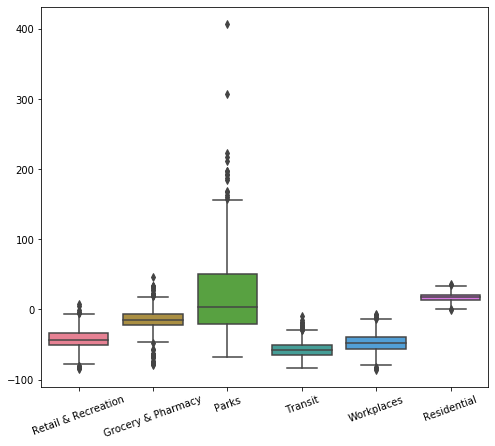

In [5]:
places = ['Retail & Recreation', 'Grocery & Pharmacy', 'Parks', 'Transit', 'Workplaces', 'Residential']
plt.figure(figsize=(8, 7))
boxplot = sns.boxplot(data=provinces_mobility[places], palette='husl')
boxplot.set_xticklabels(labels=places, rotation=20)
fig = boxplot.get_figure()
fig.savefig("output.png", dpi=400)

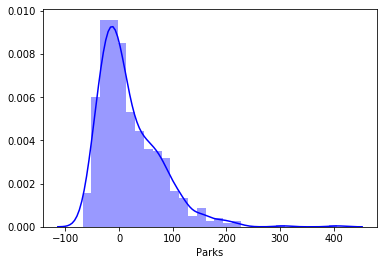

In [7]:
sns.distplot(provinces_mobility['Parks'], color='b')

As shown in the boxplot above, people visited parks and residential areas the most. However, the boxplot for parks has the largest standard deviation and there are numerous outliers at the upper end of the boxplot. This means that there are certain days where a large amount of people decided to go to parks. The potential reasons may include nicer weather as we are entering summer, people couldn't bear to stay at home any longer, etc. Residential areas have a small deviation which shows that most people still decided stay at home and did not take the risk to visit random places.
On the other hand, people visited transit stations the least. Public areas are zones that may have a high infection rate. A low median and a large standard deviation and a low median indicates that although people decided to avoid going to transit stations, there may be some individuals who still have to take public transportation to get to work.

# Interesting insight: Does daily percentage change in people going to park correlate with Google search trends for "Parks"

In [8]:
# import data
google_trends_park = pd.read_csv('/Users/ljy/Desktop/CleanedData/google_trends_park.csv', parse_dates=['date'])
canada_provinces_park = pd.read_csv('/Users/ljy/Desktop/CleanedData/canada_provinces_park.csv', parse_dates=['date'])

/Users/ljy/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Google Trends vs Canada Mobility Trend for "park"')

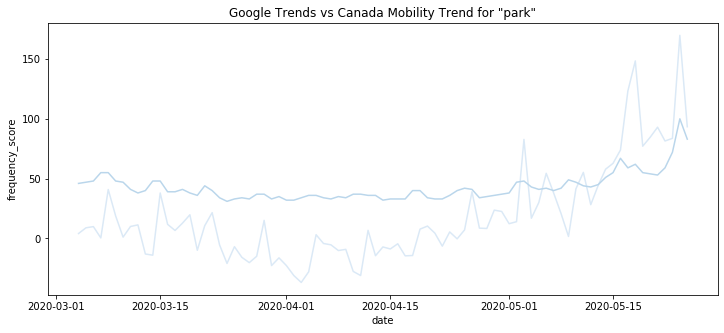

In [9]:
# lineplots 
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='parks', data=canada_provinces_park, palette='Blues-r')
sns.lineplot(x='date', y='frequency_score', data=google_trends_park, palette='Blues-r').\
set_title('Google Trends vs Canada Mobility Trend for "park"')
# set_ylabel('Date')
# plt_parks.set_axis_labels('Date', 'Frequency score/Parks')

In [10]:
google_trends_park = google_trends_park.rename(columns={'frequency_score': 'Parks - Google Trends'})
canada_provinces_park = canada_provinces_park.rename(columns={'parks': 'Parks - Google Mobility'})

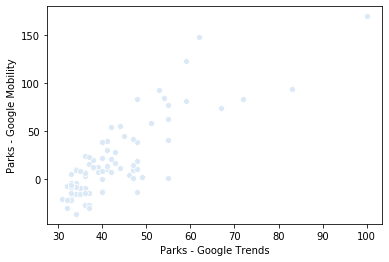

In [12]:
# A scatterplot between Google trends "park" and Canada mobility "park"
parks_corr = sns.scatterplot(x=google_trends_park['Parks - Google Trends'], y=canada_provinces_park['Parks - Google Mobility'])
fig = parks_corr.get_figure()
fig.savefig("output.png")

# How do mobility trends vary as time progresses?

In [15]:
provinces_mobility.head()

,Unnamed: 0,country_code,country,region_1,date,Retail & Recreation,Grocery & Pharmacy,Parks,Transit,Workplaces,Residential
30,16930,CA,Canada,Alberta,2020-03-16,-11.0,31.0,-13.0,-39.0,-22.0,9.0
31,16931,CA,Canada,Alberta,2020-03-17,-21.0,17.0,-12.0,-45.0,-29.0,13.0
32,16932,CA,Canada,Alberta,2020-03-18,-31.0,11.0,-24.0,-52.0,-35.0,16.0
33,16933,CA,Canada,Alberta,2020-03-19,-35.0,3.0,-28.0,-56.0,-39.0,18.0
34,16934,CA,Canada,Alberta,2020-03-20,-38.0,4.0,-9.0,-53.0,-40.0,19.0


In [16]:
groupby_date_data = provinces_mobility.groupby('date').mean().reset_index()

categories = ['retail_recreation', 'grocery_pharmacy', 'parks', 'transit', 'workplaces', 'residential']

# def plot_categories(category):
#     plt.figure(figsize=(12, 5))
#     sns.lineplot(x='date', y=category, data=groupby_date_data)

# for category in categories:
#     plot_categories(category)


# How do mobility trends for park differ across provinces?

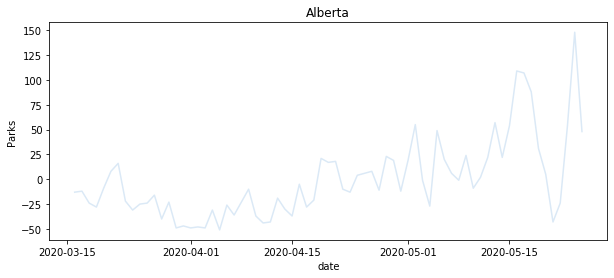

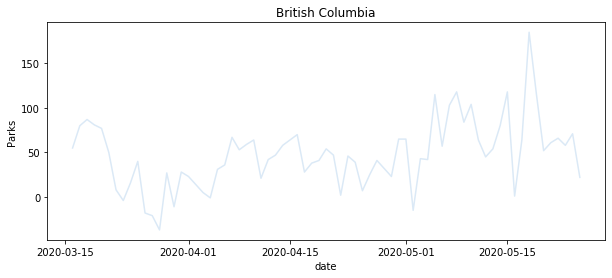

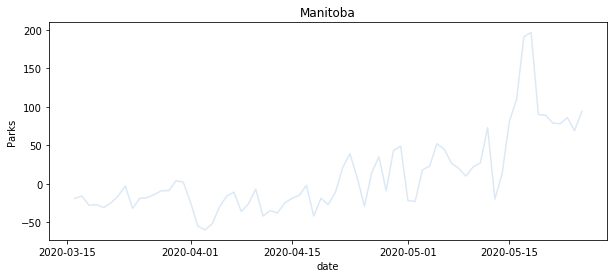

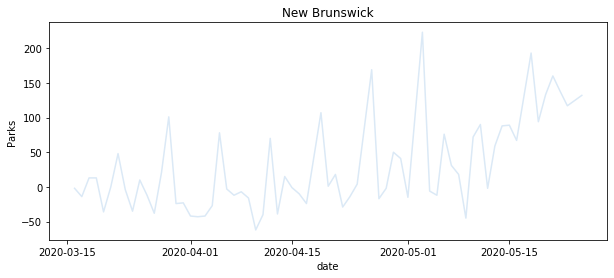

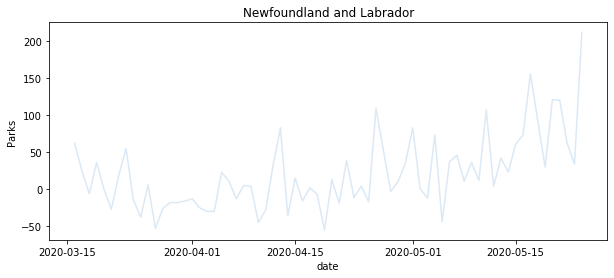

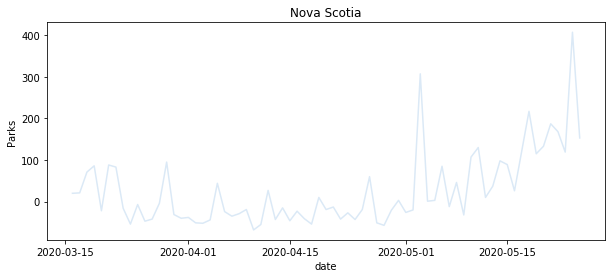

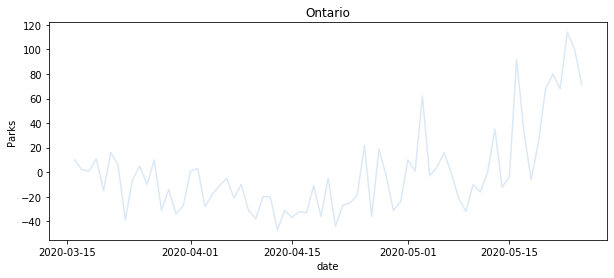

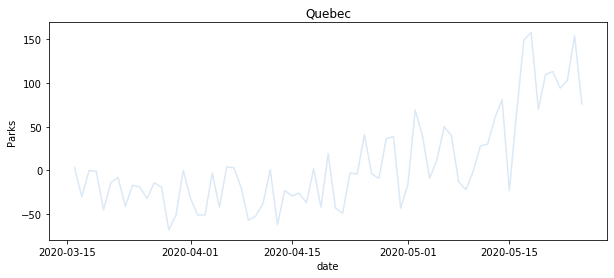

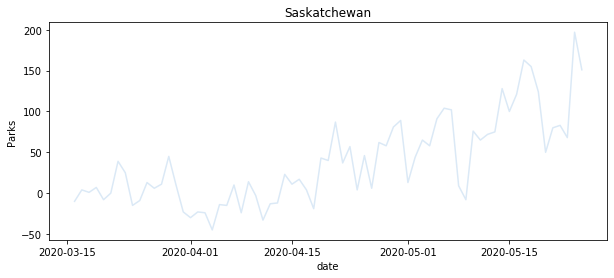

In [19]:
def lineplot_park(province):
    park_data = provinces_mobility.loc[provinces_mobility.region_1 == province]
    plt.figure(figsize=(10, 4))
    sns.lineplot(x='date', y='Parks', data=park_data).set_title(province)
    
for province in provinces_mobility.region_1.unique():
    lineplot_park(province)

# How do Social Distancing Score vary across provinces?

In [23]:
# import data
standardized_mobility = pd.read_csv('/Users/ljy/Desktop/CleanedData/standardized_mobility_data.csv', parse_dates=['date'])

# remove unused column
standardized_mobility = standardized_mobility.drop(['Unnamed: 0'], axis=1)

# convert float to int
categories = ['retail_recreation', 'grocery_pharmacy', 'parks', 'transit', 'workplaces', 'residential']
for category in categories:
    standardized_mobility[category] = standardized_mobility[category].astype(int)
standardized_mobility['s_d_score'] = standardized_mobility['s_d_score'].astype(int)


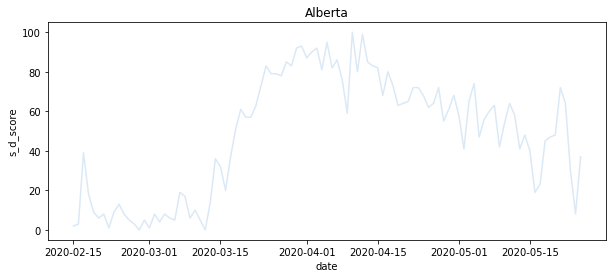

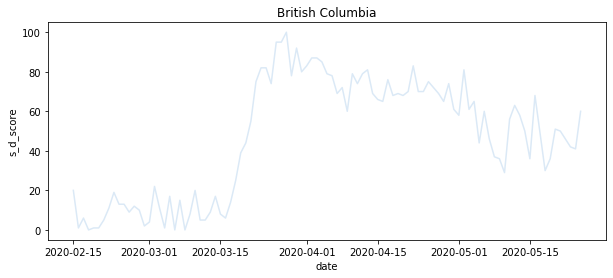

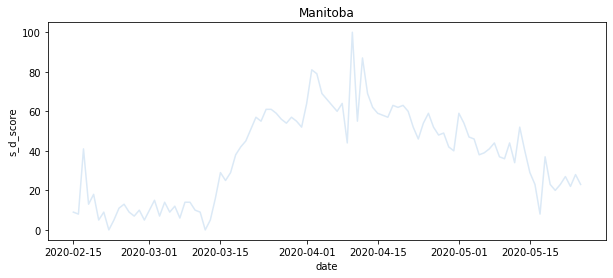

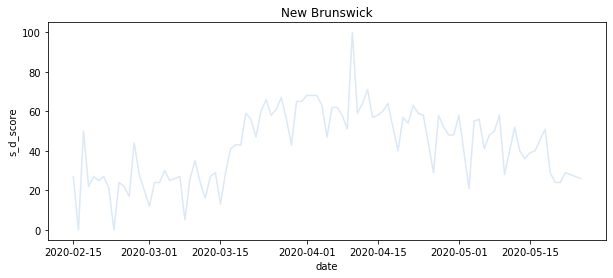

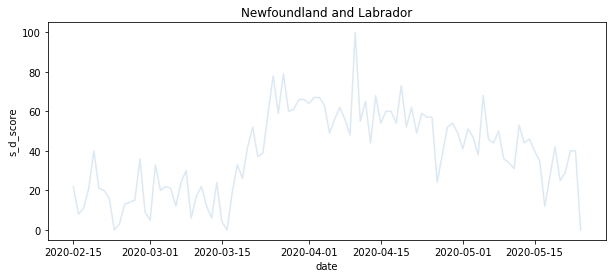

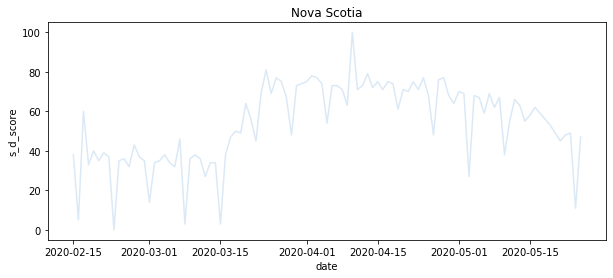

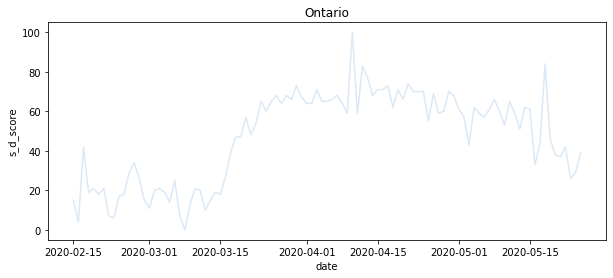

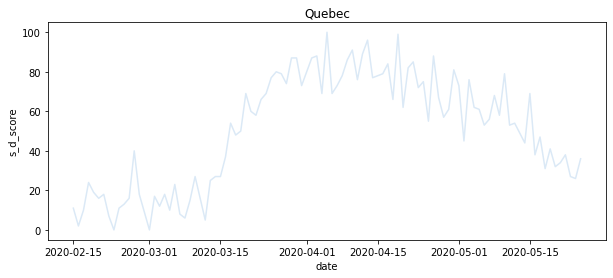

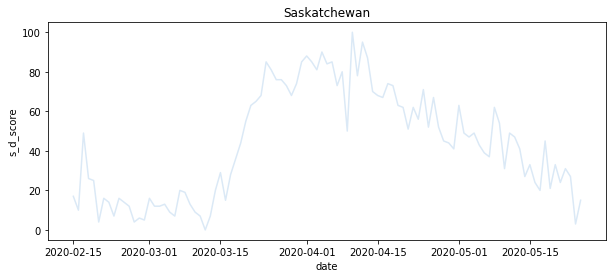

In [24]:
def lineplot_s_d(province):
    s_d_data = standardized_mobility.loc[standardized_mobility.region_1 == province]
    plt.figure(figsize=(10, 4))
    sns.lineplot(x='date', y='s_d_score', data=s_d_data).set_title(province)
    
for province in standardized_mobility.region_1.unique():
    lineplot_s_d(province)

# How do Social Distancing Score vary in Canada?

In [25]:
# group data by province
canada_score = standardized_mobility.groupby('date').mean().reset_index()

# convert float to int
categories = ['retail_recreation', 'grocery_pharmacy', 'parks', 'transit', 'workplaces', 'residential']
for category in categories:
    canada_score[category] = canada_score[category].astype(int)
canada_score['s_d_score'] = canada_score['s_d_score'].astype(int)

# rename columns
canada_score = canada_score.rename(columns={'s_d_score': 'Social Distancing Score', 'date': 'Date'})

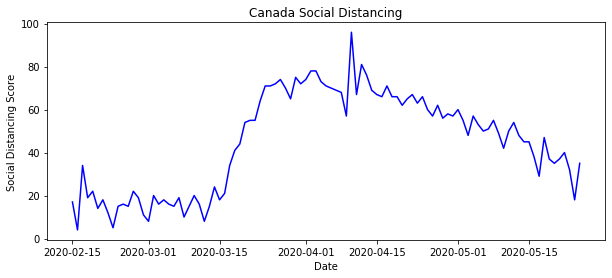

In [26]:
# plot
plt.figure(figsize=(10, 4))
lineplot = sns.lineplot(x='Date', y='Social Distancing Score', data=canada_score, color="b"). \
set_title('Canada Social Distancing')
fig = lineplot.get_figure()
fig.savefig("output.png", dpi=400)